<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hello, my name is Sveta, I was the reviewer on your second project. How are you? Do you like the course? 
    
    

Let's get started! I will be using the same color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> great job! You have a strong analytical, visualization and programming skills. Thank you very much for such a good project 😊 There is just a couple of questions, but it will definitely not take much time. As usual, feel free to ask questions if you have any. I will be glad to help. 
    
    

</div>

<div class="alert alert-block alert-info"> <b>Sveta, thank you for your review!</b> <a class="tocSkip"></a> 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you for such a good job 😊 I've left a few comments titled as **Reviewer's comment 2**. You will find a more detailed comment about the revenue issue there. I've also shown an example of using `max` function that you may find useful 😉 

The only thing we need to fix now is revenue calculation.     
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>


Thank you for the explanation. You are right, we can use this approach. I've left a couple of new comments, but I do not have any questions now. 
    
    
Your project has passed code review. Congratulations 😊
    

    
Take care and good luck! 😊   
    
    
    
    
<hr>
    
    
Best regards,
    
Sveta
     
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [99]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


## Load data

In [100]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_calls


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [101]:
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_internet


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [102]:
df_msgs = pd.read_csv('/datasets/megaline_messages.csv')
df_msgs


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [103]:
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [104]:
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [105]:
display(df_calls.info())
display(df_internet.info())
display(df_msgs.info())
display(df_plans.info())
display(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Nice introductory part! </div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment </b>
    

Don't forget about intermediate conclusions 😉
</div>

<div class="alert alert-block alert-info"> <b>Ok, I'll try)
    
We loaded all data files ,that we needed for analysis</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Great!     
    
</div>

## Prepare the data

Need to check data for duplacates. And to fill in the missing values in [churn_date] in df_users.

In [106]:
display(df_calls.duplicated().sum())
display(df_internet.duplicated().sum())
display(df_msgs.duplicated().sum())
display(df_users.duplicated().sum())

0

0

0

0

In [107]:
display(df_calls.info())
df_calls.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

,id,user_id,call_date,duration
count,137735,137735.000000,137735,137735.000000
unique,137735,NaN,351,NaN
top,1094_1181,NaN,2018-12-27,NaN
freq,1,NaN,1091,NaN
mean,NaN,1247.658046,NaN,6.745927
std,NaN,139.416268,NaN,5.839241
min,NaN,1000.000000,NaN,0.000000
25%,NaN,1128.000000,NaN,1.290000
50%,NaN,1247.000000,NaN,5.980000
75%,NaN,1365.000000,NaN,10.690000


For fillna df_users['churn_date'] need to understand when was taken the data (because if in df_users['churn_date'] we have NaN that means that on moment of data taken user was still client). For that need to take max date of all datas.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
I think we can ignore them.    
</div>

In [108]:
print(df_calls['call_date'].max())
print(df_internet['session_date'].max())
print(df_msgs['message_date'].max())

2018-12-31
2018-12-31
2018-12-31


So we can conclude, that final date of data is 2018-12-31, and we can fullna with this date column df_users['churn_date'] 

In [109]:
df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')
df_users['churn_date'].isna().sum()

0

Next I see wrong datatypes:
1) In df_calls [call_date] now object, need to be datetype

2) In df_internet [session_date] now object, need to be datetype

3) In df_msgs [message_date] now object, need to be datetype

4) In df_users [reg_date] and [churn_date] now object, need to be datetype

In [110]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_msgs['message_date'] = pd.to_datetime(df_msgs['message_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
You can use **parse_dates**: `parse_dates=['call_date']` when reading data. Pandas will try to automatically convert this list of columns to datetime. This is a good [article](https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e) with the examples.

</div>

<div class="alert alert-block alert-info"> <b>Thank you!</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
😉    
</div>

## Plans

In [111]:
# Print the general/summary information about the plans' DataFrame
display(df_plans.info())
df_plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Users

In [112]:
# Print the general/summary information about the users' DataFrame
display(df_users.info())
df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31


In [113]:
# Print a sample of data for users
df_users.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
198,1198,Russ,Horne,69,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-01,surf,2018-12-31
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,2018-12-31
327,1327,Natosha,Peck,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-17,surf,2018-12-31
388,1388,Thu,Noel,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-28,ultimate,2018-12-31
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01


I add df_users['month_used'] column that show how long client is our client

In [114]:
df_users['month_used'] = df_users['churn_date'].dt.month - df_users['reg_date'].dt.month + 1
    
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,4
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,11
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,1
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,11


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Makes sense. 
</div>

## Calls

In [115]:
# Print the general/summary information about the calls' DataFrame
df_calls


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


Because of each individual call is rounded up, i'll add new column with rounded minutes of each call.

In [116]:
df_calls['duration_rounded'] = df_calls['duration'].apply(np.ceil).astype('int')
df_calls['duration_rounded']

0          9
1         14
2         15
3          6
4          5
          ..
137730     9
137731    11
137732     9
137733     1
137734    14
Name: duration_rounded, Length: 137735, dtype: int64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Yes, `ceil` is exactly what we need here. However, it does not need `apply`. 

</div>

In [117]:
df_calls['month'] = df_calls['call_date'].dt.month.astype('int')
df_calls

,id,user_id,call_date,duration,duration_rounded,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9,11
137731,1499_200,1499,2018-10-20,10.89,11,10
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,1,10


## Messages

In [118]:
# Print the general/summary information about the messages' DataFrame
df_msgs


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [119]:
df_msgs['month'] = df_msgs['message_date'].dt.month.astype('int')
df_msgs

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [120]:
# Print the general/summary information about the internet DataFrame
df_internet


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [121]:
df_internet['month'] = df_internet['session_date'].dt.month.astype('int')
df_internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


## Study plan conditions

In [122]:
# Print out the plan conditions and make sure they are clear for you
df_plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [123]:
df_calls

,id,user_id,call_date,duration,duration_rounded,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9,11
137731,1499_200,1499,2018-10-20,10.89,11,10
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,1,10


In [124]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = df_calls.groupby(['user_id', 'month'])['duration_rounded'].agg(['count']).reset_index()
calls_per_month

,user_id,month,count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [125]:
# Calculate the amount of minutes spent by each user per month. Save the result.
min_per_month = df_calls.groupby(['user_id', 'month'])['duration_rounded'].agg(['sum']).reset_index()
min_per_month

,user_id,month,sum
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Since `agg` receives a list, we can define a list of agg functions and do everything in one `groupby`:
</div>

In [126]:
# Reviwer's code 

df_calls.groupby(['user_id', 'month'])['duration_rounded'].agg(['sum','count'])

sum  count
user_id month            
1000    12     124     16
1001    8      182     27
        9      315     49
        10     393     65
        11     426     64
...            ...    ...
1498    12     339     39
1499    9      346     41
        10     385     53
        11     308     45
        12     496     65

[2258 rows x 2 columns]

<div class="alert alert-block alert-info"> <b>Got it</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
👍    
</div>

In [127]:
# Calculate the number of messages sent by each user per month. Save the result.
msgs_per_month = df_msgs.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()
msgs_per_month


,user_id,month,count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [128]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_per_month = df_internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()
internet_per_month


,user_id,month,sum
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [129]:
internet_per_month['gb_per_month'] = (internet_per_month['sum'] / 1024).apply(np.ceil).astype('int')
internet_per_month

,user_id,month,sum,gb_per_month
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Correct. 
</div>

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [130]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
data_frames = [calls_per_month, min_per_month, msgs_per_month, internet_per_month]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'],
                                            how='outer'), data_frames).fillna(0)
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       2293 non-null   int64  
 1   month         2293 non-null   int64  
 2   count_x       2293 non-null   float64
 3   sum_x         2293 non-null   float64
 4   count_y       2293 non-null   float64
 5   sum_y         2293 non-null   float64
 6   gb_per_month  2293 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
`reduce` is a high level method, well done! By the way, we can just use `merge` several times. 
</div>

In [131]:
df_merged

,user_id,month,count_x,sum_x,count_y,sum_y,gb_per_month
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,2.0
2290,1482,10,0.0,0.0,2.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


In [132]:
df_merged.rename(columns = {'count_x':'calls_per_month', 'sum_x':'min_per_month', 'count_y':'msgs_per_month'}, inplace = True)
df_merged.drop('sum_y', inplace=True, axis=1)
df_merged

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0


In [133]:
df_merged = df_merged.sort_values(by=['user_id', 'month']).reset_index(drop=True)

df_merged

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23.0
2289,1499,9,41.0,346.0,0.0,13.0
2290,1499,10,53.0,385.0,0.0,20.0
2291,1499,11,45.0,308.0,0.0,17.0


In [134]:
df_merged.calls_per_month = df_merged.calls_per_month.astype('int')
df_merged.min_per_month = df_merged.min_per_month.astype('int')
df_merged.msgs_per_month = df_merged.msgs_per_month.astype('int')
df_merged.gb_per_month = df_merged.gb_per_month.astype('int')
df_merged

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month
0,1000,12,16,124,11,2
1,1001,8,27,182,30,7
2,1001,9,49,315,44,14
3,1001,10,65,393,53,22
4,1001,11,64,426,36,19
...,...,...,...,...,...,...
2288,1498,12,39,339,0,23
2289,1499,9,41,346,0,13
2290,1499,10,53,385,0,20
2291,1499,11,45,308,0,17


In [135]:
# Add the plan information
plans_users = df_users.loc[:, df_users.columns.isin(['user_id', 'plan', 'month_used'])]
data_frames2 = [df_merged, plans_users]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                            how='outer'), data_frames2)
df_merged = df_merged.sort_values(by=['user_id', 'month']).reset_index(drop=True)
df_merged


,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,plan,month_used
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1
1,1001,8.0,27.0,182.0,30.0,7.0,surf,5
2,1001,9.0,49.0,315.0,44.0,14.0,surf,5
3,1001,10.0,65.0,393.0,53.0,22.0,surf,5
4,1001,11.0,64.0,426.0,36.0,19.0,surf,5
...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,11
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,8
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,8
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,8


Here we see, that for example for user 1499 we have just 4 rows, but value 8 in ['month_used']. That means, that client paid for 8 month for plan, but only 4 month he was active.

So I'll make column for overspending, separate column for plan revenue, and then to calculate overall revenue I will split the value of plan on count of rows and add it to overspending revenue.

In [136]:
def plan_revenue(row):
    if row['plan'] == 'ultimate':
        return row['month_used']*70
    else:
        return row['month_used']*20

df_merged['plan_revenue'] = df_merged.apply(plan_revenue,axis=1)
df_merged

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,plan,month_used,plan_revenue
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1,70
1,1001,8.0,27.0,182.0,30.0,7.0,surf,5,100
2,1001,9.0,49.0,315.0,44.0,14.0,surf,5,100
3,1001,10.0,65.0,393.0,53.0,22.0,surf,5,100
4,1001,11.0,64.0,426.0,36.0,19.0,surf,5,100
...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,11,220
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,8,160
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,8,160
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,8,160


In [137]:
# Calculate the monthly revenue for each user
def overspend_revenue(row):
    plan=row['plan']
    min_per_month=row['min_per_month']
    msgs_per_month=row['msgs_per_month']
    gb_per_month=row['gb_per_month']
           
    if plan=='ultimate' and min_per_month > 3000:
        calls_revenue=(min_per_month - 3000)*0.01
    elif plan=='surf' and min_per_month > 500:
        calls_revenue=(min_per_month - 500)*0.03
    else:
        calls_revenue=0
    
    if plan=='ultimate' and msgs_per_month > 1000:
        msgs_revenue=(msgs_per_month - 1000)*0.01
    elif plan=='surf' and msgs_per_month > 50:
        msgs_revenue=(msgs_per_month - 50)*0.03
    else:
        msgs_revenue=0
        
    if plan=='ultimate' and gb_per_month > 30:
        internet_revenue=(gb_per_month - 30)*7
    elif plan=='surf' and gb_per_month > 15:
        internet_revenue=(gb_per_month - 15)*10
    else:
        internet_revenue=0

    overspend_revenue=calls_revenue+msgs_revenue+internet_revenue
    return overspend_revenue

df_merged['overspend_revenue']=df_merged.apply(overspend_revenue,axis=1)
df_merged

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,plan,month_used,plan_revenue,overspend_revenue
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1,70,0.00
1,1001,8.0,27.0,182.0,30.0,7.0,surf,5,100,0.00
2,1001,9.0,49.0,315.0,44.0,14.0,surf,5,100,0.00
3,1001,10.0,65.0,393.0,53.0,22.0,surf,5,100,70.09
4,1001,11.0,64.0,426.0,36.0,19.0,surf,5,100,40.00
...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,11,220,80.00
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,8,160,0.00
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,8,160,50.00
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,8,160,20.00


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
It's highly recommended to use variables instead of constant values. It will give us the possibility to use one function for different tasks and different plans, not only for Surf-Ultimate calculations. Moreover, it will help you avoid typos.

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There's a function that returns the maximum between 2 values. With this function you will not need to check if-else statements.
</div>

```python

max(0, (gb_per_month - 30)*7)
```

<div class="alert alert-block alert-info"> <b>I tried below, changed constant values to variables and used your decision with function 'max'. But didn't understand how can I avoid 'if-else statements.' because we need to know what plan we check in function now. (For example if ultimate - limits 30, if surf - limits 15)
    
I wrote it as comment, to not disturb full analysis.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Use one if-else for plans. For everything else you can apply this technique. Take a look:     
</div>

<div class="alert alert-block alert-info"> <b>Got it, thank you!</b> <a class="tocSkip"></a> 
</div>

In [138]:
# Reviewer's code 2

def overspend_revenue2 (row):
    plan=row['plan']
    min_per_month=row['min_per_month']
    msgs_per_month=row['msgs_per_month']
    gb_per_month=row['gb_per_month']
           
        
    if plan == 'ultimate':
        return max(0, (min_per_month - 3000)*0.01) + max(0, (msgs_per_month - 1000)*0.01) + max(0, (gb_per_month - 30)*7)
    else: 
        return max(0, (min_per_month - 500)*0.03) + max(0, (msgs_per_month - 50)*0.03) + max(0, (gb_per_month - 15)*10)
        
    

df_merged.apply(overspend_revenue2,axis=1)


0        0.00
1        0.00
2        0.00
3       70.09
4       40.00
        ...  
2298    80.00
2299     0.00
2300    50.00
2301    20.00
2302    70.00
Length: 2303, dtype: float64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Let's compare out results: </div>

In [139]:
# Reviewer's code 2

df_merged.apply(overspend_revenue2,axis=1).equals(df_merged.apply(overspend_revenue,axis=1))

True

In [140]:
#def overspend_revenue(row):
#    plan=row['plan']
#    min_per_month=row['min_per_month']
#    msgs_per_month=row['msgs_per_month']
#    gb_per_month=row['gb_per_month']
#
#    limit_minutes_ultimate=3000
#    limit_minutes_surf=500
#    cost_per_over_minute_ultimate=0.01
#    cost_per_over_minute_surf=0.03
#           
#    if plan=='ultimate':
#        calls_revenue=max(0, (min_per_month - limit_minutes_ultimate)*cost_per_over_minute_ultimate)
#    elif plan=='surf':
#        calls_revenue=(min_per_month - limit_minutes_surf)*cost_per_over_minute_surf
#    else:
#       continue
#
#    limit_msgs_ultimate=1000
#    limit_msgs_surf=50
#    cost_per_over_msg_ultimate=0.01
#    cost_per_over_msg_surf=0.03
#    
#    if plan=='ultimate':
#        msgs_revenue=max(0, (msgs_per_month - limit_msgs_ultimate)*cost_per_over_msg_ultimate)
#    elif plan=='surf':
#        msgs_revenue=max(0, (msgs_per_month - limit_msgs_surf)*cost_per_over_msg_surf)
#    else:
#        continue
#
#    limit_gb_ultimate=30
#    limit_gb_surf=15
#    cost_per_over_gb_ultimate=7
#    cost_per_over_gb_surf=10
#        
#    if plan=='ultimate':
#        internet_revenue=max(0, (gb_per_month - limit_gb_ultimate)*cost_per_over_gb_ultimate)
#    elif plan=='surf':
#        internet_revenue=max(0, (gb_per_month - limit_gb_surf)*cost_per_over_gb_surf)
#    else:
#        continue
#
#    overspend_revenue=calls_revenue+msgs_revenue+internet_revenue
#    return overspend_revenue

In [141]:

df_merged['count_of_rows'] = df_merged.groupby('user_id')['user_id'].transform('count')
df_merged.head(20)
    

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,plan,month_used,plan_revenue,overspend_revenue,count_of_rows
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1,70,0.00,1
1,1001,8.0,27.0,182.0,30.0,7.0,surf,5,100,0.00,5
2,1001,9.0,49.0,315.0,44.0,14.0,surf,5,100,0.00,5
3,1001,10.0,65.0,393.0,53.0,22.0,surf,5,100,70.09,5
4,1001,11.0,64.0,426.0,36.0,19.0,surf,5,100,40.00,5
5,1001,12.0,56.0,412.0,44.0,19.0,surf,5,100,40.00,5
6,1002,10.0,11.0,59.0,15.0,7.0,surf,3,60,0.00,3
7,1002,11.0,55.0,386.0,32.0,19.0,surf,3,60,40.00,3
8,1002,12.0,47.0,384.0,41.0,15.0,surf,3,60,0.00,3
9,1003,12.0,149.0,1104.0,50.0,27.0,surf,12,240,138.12,1


In [142]:
df_merged['total_revenue_per_month'] = df_merged['overspend_revenue'] + df_merged['plan_revenue']/df_merged['count_of_rows']
df_merged

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,plan,month_used,plan_revenue,overspend_revenue,count_of_rows,total_revenue_per_month
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,1,70,0.00,1,70.00
1,1001,8.0,27.0,182.0,30.0,7.0,surf,5,100,0.00,5,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,surf,5,100,0.00,5,20.00
3,1001,10.0,65.0,393.0,53.0,22.0,surf,5,100,70.09,5,90.09
4,1001,11.0,64.0,426.0,36.0,19.0,surf,5,100,40.00,5,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,11,220,80.00,11,100.00
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,8,160,0.00,4,40.00
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,8,160,50.00,4,90.00
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,8,160,20.00,4,60.00


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Let's just add monthly charge to `overspend_revenue` right in the function. Take a look at the very last row. A person has `overspend_revenue` equal to 70. Monthly charge is 20. Therefore, we are supposed to receive 90 somewhere. Otherwise, we just cannot analyze revenue per month. 
</div>

<div class="alert alert-block alert-info"> <b>Maybe I didn't understand well, or does something wrong. Here is my calculation about last row:
    
It is client 1499. And he was client for 8 month with surf plan. That means, that he paid 8 times for plan. But we have only 4 rows of this user. His behavior was: 4 months he didn't use nothing, so he just paid for plan 20$ per month (we haven't got those rows). And then for last 4 month he used some of mins/messages/internet, and thats why we see those rows (months 9, 10, 11, 12). 

Thats why here in last row we see 110, not 90 - I decided to divide all his money that he paid for plan to number of rows. He paid 8 times = 160 dollars, and now divede it to number of rows 160 dollars / 4 = 40 dollars, thats why here in last row we have 110, not 90.

If I'll add monthly charge to overspend_revenue right in the function, I'll lost all months when clients paid for plan, and didn't use mins/msgs/internet for some reason.
    
I understand, that my desicion is a crutch, but don't know how to fix it.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Consider row #2302:  </div>

In [45]:
# Reviewer's code 2

df_merged.loc[2302]

user_id                     1499
month                       12.0
calls_per_month             65.0
min_per_month              496.0
msgs_per_month               0.0
gb_per_month                22.0
plan                        surf
month_used                     8
plan_revenue                 160
overspend_revenue           70.0
count_of_rows                  4
total_revenue_per_month    110.0
Name: 2302, dtype: object

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Plan's fee is 20. You multiplied 20 by 8 (why 8, by the way?) and received 160. True, but it is not an amount of money he or she spent in the 12th month. It is the total amount of money. Why do we count this total amount 8 times? No, we are supposed to have a monthly payment. If this person payed 70 for calls, messages and internet in 12th month and if the fee is 20, then in 12th month we are to have 90, not 160. Using the same logic, we have to calculate how much money did this person pay  all in other months. As a result, we will have a dataframe that represents monthly data. 


I also didn't understand why do we multiply by 8 if this person has only 4 months in our data (see the code below). 


Speaking of revenue, I would propose to add plan's fee in the revenue calculation right inside a function. For surf users you should add 20 and 70 - for ultimate users. </div>

In [46]:
# Reviewer's code 2

df_merged[df_merged['user_id']==1499]

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,plan,month_used,plan_revenue,overspend_revenue,count_of_rows,total_revenue_per_month
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,8,160,0.0,4,40.0
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,8,160,50.0,4,90.0
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,8,160,20.0,4,60.0
2302,1499,12.0,65.0,496.0,0.0,22.0,surf,8,160,70.0,4,110.0


<div class="alert alert-block alert-info"> <b>About this user - 1499. If we watch at df_users, we see, that her reg_date 06 of may, and her churn_day 31 of december. So, I added column [month_used] that calculate count of month that client was our client.For this user it is 8, because she was our client at 5,6,7,8,9,10,11,12 month. But we have only 4 rows of this client in df_merged because she used her minutes/msgs/internet only in 9,10,11,12 month. But at 5,6,7,8 month she also was our client and paid for those months 20$ per month for plan Surf. Thats why I multiplied 20 by 8 for this client.

Is it wrong logic?</b> <a class="tocSkip"></a> 
</div>

In [47]:
# Answer at Reviewer's code 2
df_users[df_users['user_id']==1499]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_used
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,2018-12-31,8


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
I got it. Thank you for the clarification. Although we do not have the evidence that such users paid their fees, it is still acceptable to assume that. Then my question is not relevant anymore :) If I were to calculate the revenue, I would just add plan's fee to the `overspend_revenue`. Example:
    
</div>

In [149]:
# Reviewer's code 3

ddf = df_merged.copy()

def overspend_revenue3 (row):
    plan=row['plan']
    min_per_month=row['min_per_month']
    msgs_per_month=row['msgs_per_month']
    gb_per_month=row['gb_per_month']
           
        
    if plan == 'ultimate':
        return 70 + max(0, (min_per_month - 3000)*0.01) + max(0, (msgs_per_month - 1000)*0.01) + max(0, (gb_per_month - 30)*7)
    else: 
        return 20 + max(0, (min_per_month - 500)*0.03) + max(0, (msgs_per_month - 50)*0.03) + max(0, (gb_per_month - 15)*10)
        
    

ddf['revenue'] = ddf.apply(overspend_revenue3,axis=1)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Then the distribution would look like this:     
</div>

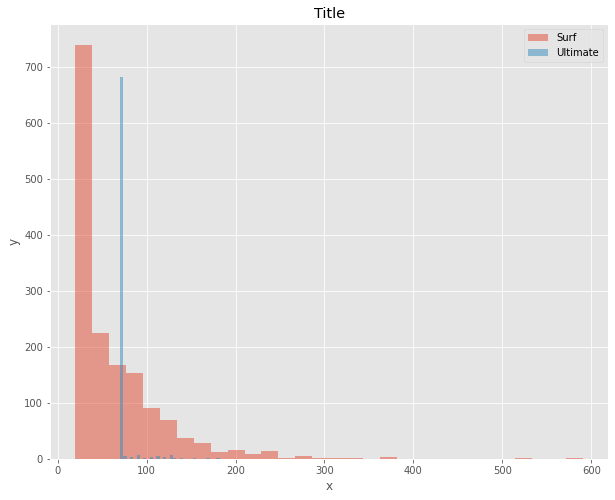

In [153]:
# Reviewer's code 3

plt.style.use('ggplot') # Add style. You can put it in the very first cell, after plt is defined.

ddf.groupby('plan')['revenue'].plot.hist(alpha=0.5, legend=True, bins=30, figsize=(10,8))

plt.legend(['Surf', 'Ultimate'])
plt.title('Title')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Which coincides with the distribution you've shown below.    
</div>

In [48]:
df_merged[df_merged['month'].isna()]

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,plan,month_used,plan_revenue,overspend_revenue,count_of_rows,total_revenue_per_month
86,1025,NaN,NaN,NaN,NaN,NaN,ultimate,3,210,0.0,1,210.0
612,1129,NaN,NaN,NaN,NaN,NaN,surf,2,40,0.0,1,40.0
682,1143,NaN,NaN,NaN,NaN,NaN,surf,3,60,0.0,1,60.0
1285,1269,NaN,NaN,NaN,NaN,NaN,ultimate,4,280,0.0,1,280.0
1297,1275,NaN,NaN,NaN,NaN,NaN,ultimate,2,140,0.0,1,140.0
1418,1307,NaN,NaN,NaN,NaN,NaN,surf,1,20,0.0,1,20.0
1466,1319,NaN,NaN,NaN,NaN,NaN,surf,7,140,0.0,1,140.0
1762,1378,NaN,NaN,NaN,NaN,NaN,surf,1,20,0.0,1,20.0
2139,1463,NaN,NaN,NaN,NaN,NaN,ultimate,2,140,0.0,1,140.0
2189,1473,NaN,NaN,NaN,NaN,NaN,surf,1,20,0.0,1,20.0


Here I see 10 clients, that paid for plan for 1 and more month, but didn't use any options.

I can fill in those missing values with 0, and remember, that here ['total_revenue_per_month'] is not for 1 month, but for full time.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Agreed.     
</div>

In [49]:
df_merged = df_merged.fillna(0)

In [50]:
df_merged.month = df_merged.month.astype('int')
df_merged.calls_per_month = df_merged.calls_per_month.astype('int')
df_merged.min_per_month = df_merged.min_per_month.astype('int')
df_merged.msgs_per_month = df_merged.msgs_per_month.astype('int')
df_merged.gb_per_month = df_merged.gb_per_month.astype('int')
df_merged

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,plan,month_used,plan_revenue,overspend_revenue,count_of_rows,total_revenue_per_month
0,1000,12,16,124,11,2,ultimate,1,70,0.00,1,70.00
1,1001,8,27,182,30,7,surf,5,100,0.00,5,20.00
2,1001,9,49,315,44,14,surf,5,100,0.00,5,20.00
3,1001,10,65,393,53,22,surf,5,100,70.09,5,90.09
4,1001,11,64,426,36,19,surf,5,100,40.00,5,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12,39,339,0,23,surf,11,220,80.00,11,100.00
2299,1499,9,41,346,0,13,surf,8,160,0.00,4,40.00
2300,1499,10,53,385,0,20,surf,8,160,50.00,4,90.00
2301,1499,11,45,308,0,17,surf,8,160,20.00,4,60.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

In [51]:
df_merged.groupby(['plan'])['user_id'].nunique()

plan
surf        339
ultimate    161
Name: user_id, dtype: int64

In [52]:
df_merged.groupby(['plan'])['total_revenue_per_month'].sum()

plan
surf        108871.18
ultimate     76636.00
Name: total_revenue_per_month, dtype: float64

In [53]:
df_merged.isnull().sum()

user_id                    0
month                      0
calls_per_month            0
min_per_month              0
msgs_per_month             0
gb_per_month               0
plan                       0
month_used                 0
plan_revenue               0
overspend_revenue          0
count_of_rows              0
total_revenue_per_month    0
dtype: int64

### Calls

In [54]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
compare_calls = df_merged.pivot_table(index=['plan', 'month'], values='min_per_month', aggfunc=('mean')).sort_values(by=['plan', 'month'], ascending=True).reset_index()
display(compare_calls)

,plan,month,min_per_month
0,surf,0,0.000000
1,surf,1,203.000000
2,surf,2,297.000000
3,surf,3,330.000000
4,surf,4,351.540000
5,surf,5,399.584416
6,surf,6,431.298969
7,surf,7,449.983471
8,surf,8,410.111111
9,surf,9,414.226804


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Here and further, take the `df_merged` dataframe and plot histograms without any grouping (neither by user nor by month). We don't need to group data by anything because the idea is to plot a distribution that includes each call's duration, message and internet session. 
    
    
Don't forget to print mean, standard deviation and variance of these three parameters. Statistics should be calculated without grouping data as well, since grouping reduces the variance. We don't need to calculate mean of mean values. Instead, we need to calculate mean of the whole data array. 
</div>

<div class="alert alert-block alert-info"> <b>Something like that? Sorry, I think I don't understand what need to do here</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Actually, you fixed the statistics below, so this comment is not relevant anymore. I'll leave a few comments below. </div>

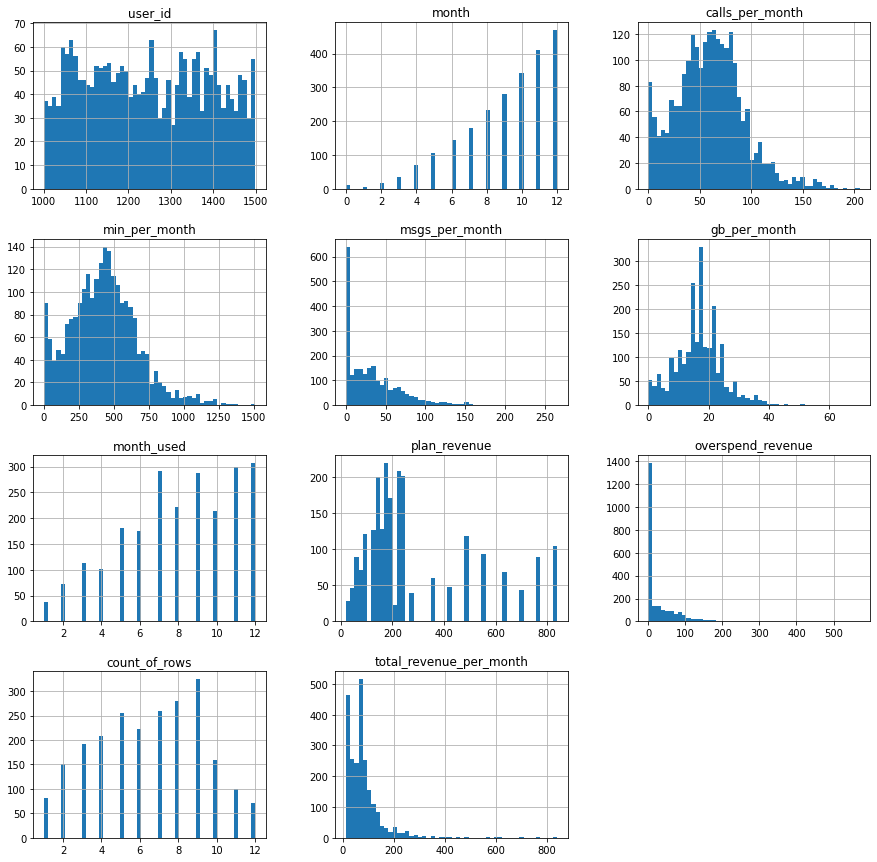

In [55]:
df_merged.hist(grid=True, figsize=(15, 15), bins=50)
plt.show()

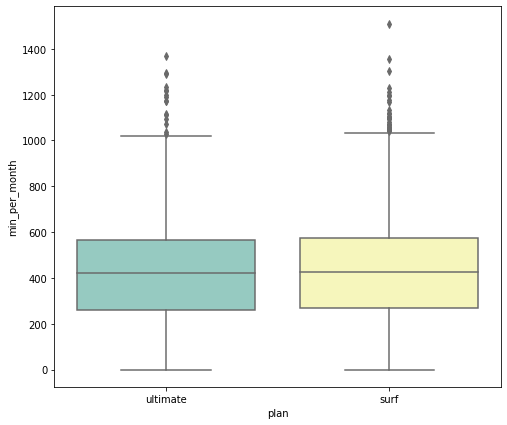

In [56]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan',y="min_per_month",
                 data=df_merged, palette="Set3")

In [57]:
#fig, ax = plt.subplots(figsize=(8,7))
#ax = sns.boxplot( x='plan',y="min_per_month",
#                 data=compare_calls, palette="Set3")

#This is old one, before review, don't use it here

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Try to group only by plan. Don't forget about variance. 
</div>

In [58]:
df_merged.groupby(['plan']).var()

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,month_used,plan_revenue,overspend_revenue,count_of_rows,total_revenue_per_month
plan,,,,,,,,,,,
surf,19376.671992,6.388224,1034.804476,55455.577400,1126.118076,62.402126,8.918474,3567.389477,3062.446864,7.836868,3517.963216
ultimate,22783.427470,6.970456,1119.205404,58543.878652,1209.827612,60.153067,8.572177,42003.665475,129.159556,8.704569,7056.985017


In [59]:
df_merged.groupby(['plan']).std()

,user_id,month,calls_per_month,min_per_month,msgs_per_month,gb_per_month,month_used,plan_revenue,overspend_revenue,count_of_rows,total_revenue_per_month
plan,,,,,,,,,,,
surf,139.200115,2.527494,32.168377,235.490079,33.557683,7.899502,2.986381,59.727627,55.339379,2.799441,59.312420
ultimate,150.941802,2.640162,33.454527,241.958423,34.782576,7.755841,2.927828,204.947958,11.364839,2.950351,84.005863


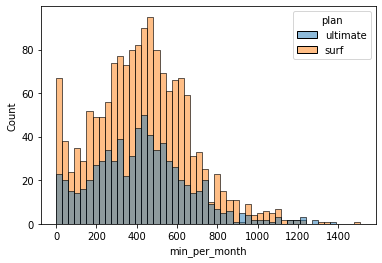

In [60]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
sns.histplot(df_merged,x='min_per_month',hue='plan', bins=50)
plt.show()


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

Good job! Don't forget to add titles. 
    
    
Try to use `plt.show()` or semicolon at the very end of the code to get rid of the line above the chart. 
    
    
</div>

<div class="alert alert-block alert-info"> <b>Thank you, looks better)</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Everything is correct now. We use `df_merged` without any grouping in orger to represent each value on the graph. Since we use histogram, we can represent a lot of values. That is why we don't need to group by month or by user_id. The idea is to evaluate the whole data regardless of month's number or user's id. 


Statistics can be displayed in a shorter way: </div>

In [61]:
# Reviewer's code 2


# For a single column.
df_merged.groupby('plan')['min_per_month'].agg(['mean', 'std', 'var'])

,mean,std,var
plan,,,
surf,427.120329,235.490079,55455.577400
ultimate,428.071823,241.958423,58543.878652


In [62]:
# Reviewer's code 2

# For several columns.
df_merged.groupby('plan')[['min_per_month', 'msgs_per_month', 'gb_per_month']].agg(['mean', 'std', 'var'])

min_per_month                           msgs_per_month             \
                  mean         std           var           mean        std   
plan                                                                         
surf        427.120329  235.490079  55455.577400      31.041165  33.557683   
ultimate    428.071823  241.958423  58543.878652      37.343923  34.782576   

                      gb_per_month                       
                  var         mean       std        var  
plan                                                     
surf      1126.118076    16.607346  7.899502  62.402126  
ultimate  1209.827612    17.211326  7.755841  60.153067

<div class="alert alert-block alert-info"> <b>Yeah, that looks informative and shorter, thank you!</b> <a class="tocSkip"></a> 
</div>

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

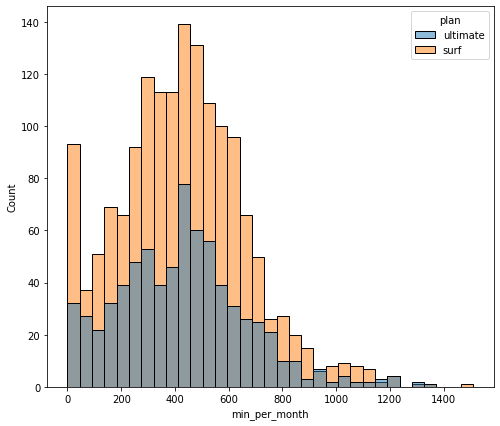

Average is 427.419452887538
plan
surf        427.120329
ultimate    428.071823
Name: min_per_month, dtype: float64
Centered around average


In [63]:
# Calculate the mean and the variance of the monthly call duration
def df_stat(what):
    fig, ax = plt.subplots(figsize=(8,7))
    ax = sns.histplot(df_merged, x=what, hue="plan")
    mean=df_merged[what].mean()
    std=df_merged[what].std()
    var=df_merged[what].var()
    cv=std/mean
    plt.show()
    print("Average is",mean)
    print(df_merged.groupby(['plan'])[what].mean())
    if cv>1:
        print("Varies a lot")
    else:
        print('Centered around average')
df_stat('min_per_month')

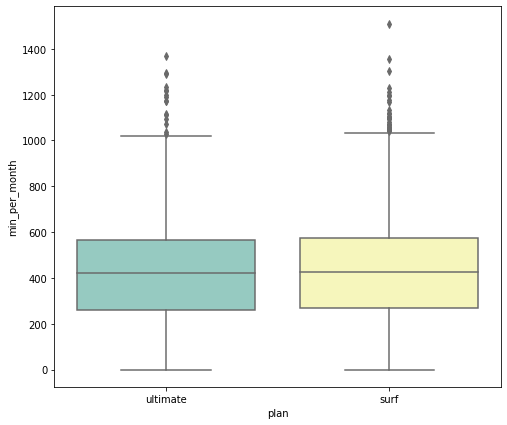

In [64]:
# Plot a boxplot to visualize the distribution of the monthly call duration
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan',y="min_per_month",
                 data=df_merged, palette="Set3")


Conclusion: behavior of clients is the same

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Also, histograms tell us that Ultimate clients can use as many minutes as they want, while Surf clients have to remember about low lmits.  </div>

### Messages

In [65]:
# Compare the number of messages users of each plan tend to send each month
compare_msgs = df_merged.pivot_table(index=['plan', 'month'], values='msgs_per_month', aggfunc=('mean')).sort_values(by=['plan', 'month'], ascending=True).reset_index()
display(compare_msgs)


,plan,month,msgs_per_month
0,surf,0,0.000000
1,surf,1,10.500000
2,surf,2,12.000000
3,surf,3,15.260870
4,surf,4,17.400000
5,surf,5,24.012987
6,surf,6,25.298969
7,surf,7,27.033058
8,surf,8,28.777778
9,surf,9,30.762887


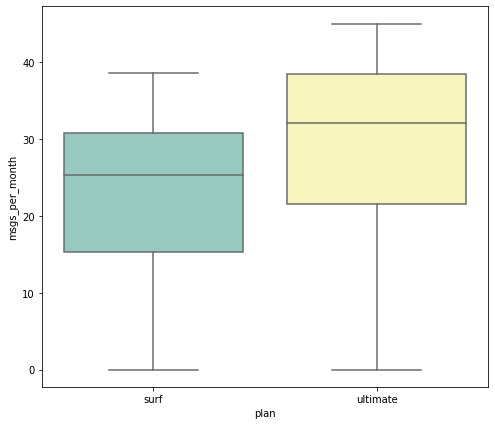

In [66]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan',y="msgs_per_month",
                 data=compare_msgs, palette="Set3")

In [67]:
df_merged.groupby(['plan'])['msgs_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1579.0,31.041165,33.557683,0.0,3.0,24.0,47.00,266.0
ultimate,724.0,37.343923,34.782576,0.0,6.0,30.0,60.25,166.0


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Here and further we also do not need to print monthly stats and we also need a variance. </div>

In [68]:
df_merged.groupby(['plan'])['msgs_per_month'].var()

plan
surf        1126.118076
ultimate    1209.827612
Name: msgs_per_month, dtype: float64

In [69]:
df_merged.groupby(['plan'])['msgs_per_month'].std()

plan
surf        33.557683
ultimate    34.782576
Name: msgs_per_month, dtype: float64

<AxesSubplot:xlabel='msgs_per_month', ylabel='Count'>

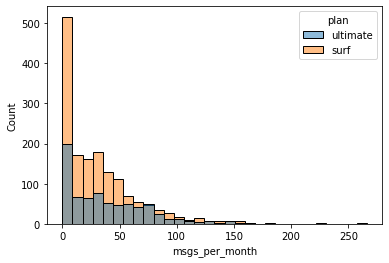

In [70]:
# Compare the amount of msgs by users per plan
sns.histplot(df_merged,x='msgs_per_month',hue='plan', bins=30)


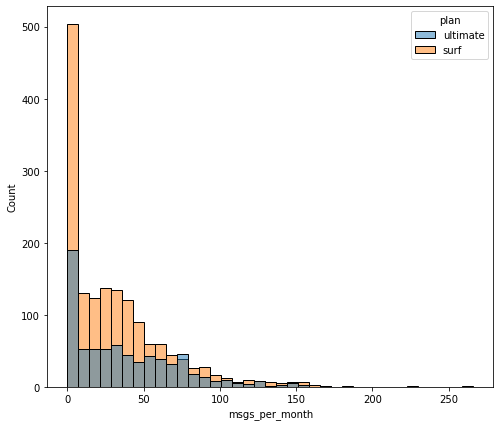

Average is 33.02257924446374
plan
surf        31.041165
ultimate    37.343923
Name: msgs_per_month, dtype: float64
Varies a lot


In [71]:
df_stat('msgs_per_month')

On histogram we see, that users behavior is almost the same, and many client don't use messages, so '0' have big influence. On Ultimate plan clients write more messages.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Seems like people rarely use messages.

</div>

### Internet

In [72]:
compare_internet = df_merged.pivot_table(index=['plan', 'month'], values='gb_per_month', aggfunc=('mean')).sort_values(by=['plan', 'month'], ascending=True).reset_index()
display(compare_internet)

,plan,month,gb_per_month
0,surf,0,0.000000
1,surf,1,5.000000
2,surf,2,12.222222
3,surf,3,13.565217
4,surf,4,12.220000
5,surf,5,14.116883
6,surf,6,15.484536
7,surf,7,16.876033
8,surf,8,16.882716
9,surf,9,16.690722


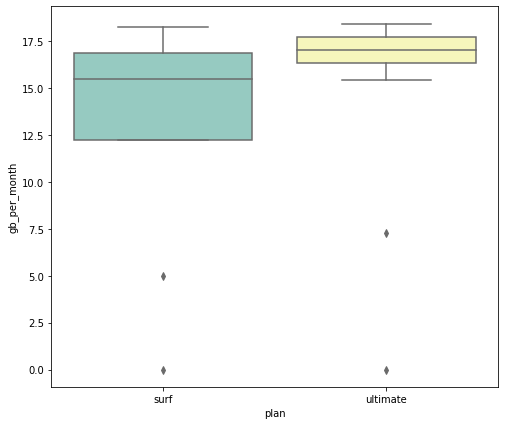

In [73]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan',y="gb_per_month",
                 data=compare_internet, palette="Set3")

In [74]:
df_merged.groupby(['plan', 'month'])['gb_per_month'].describe()

count       mean        std  min    25%   50%    75%   max
plan     month                                                            
surf     0        6.0   0.000000   0.000000  0.0   0.00   0.0   0.00   0.0
         1        2.0   5.000000   4.242641  2.0   3.50   5.0   6.50   8.0
         2        9.0  12.222222   6.437736  1.0   7.00  12.0  16.00  20.0
         3       23.0  13.565217   7.999012  2.0   6.50  14.0  19.00  30.0
         4       50.0  12.220000   7.497728  0.0   6.25  12.0  17.75  28.0
         5       77.0  14.116883   7.627813  0.0   8.00  14.0  20.00  36.0
         6       97.0  15.484536   6.910308  0.0  12.00  16.0  19.00  37.0
         7      121.0  16.876033   7.840674  0.0  13.00  17.0  21.00  39.0
         8      162.0  16.882716   8.451091  0.0  12.00  17.0  21.00  51.0
         9      194.0  16.690722   7.017167  0.0  13.00  17.0  21.00  37.0
         10     237.0  17.409283   7.792679  0.0  13.00  18.0  21.00  46.0
         11     283.0  16.431095   7.389711  0.0  12.00  17.0  21.00  42.0
         12     318.0  18.238994   8.319305  0.0  14.00  18.0  22.00  70.0
ultimate 0        4.0   0.000000   0.000000  0.0   0.00   0.0   0.00   0.0
         1        4.0   7.250000   3.862210  2.0   5.75   8.0   9.50  11.0
         2        7.0  17.285714   6.156684  5.0  16.50  20.0  20.50  22.0
         3       12.0  18.416667  11.774073  2.0   8.25  21.0  28.75  36.0
         4       21.0  16.333333   9.264628  3.0   9.00  16.0  21.00  37.0
         5       29.0  16.862069   7.361697  3.0  14.00  17.0  21.00  33.0
         6       47.0  15.425532   8.298100  2.0  10.50  15.0  20.00  38.0
         7       59.0  16.491525   8.015874  1.0  12.00  15.0  21.00  38.0
         8       71.0  17.845070   7.618864  1.0  14.00  18.0  21.00  40.0
         9       86.0  17.011628   6.874495  4.0  13.00  16.5  19.75  37.0
         10     106.0  17.716981   7.389510  0.0  13.00  17.0  21.00  46.0
         11     127.0  17.118110   7.375005  1.0  13.00  17.0  21.00  42.0
         12     151.0  18.397351   7.670793  1.0  14.00  17.0  22.00  46.0

<AxesSubplot:xlabel='gb_per_month', ylabel='Count'>

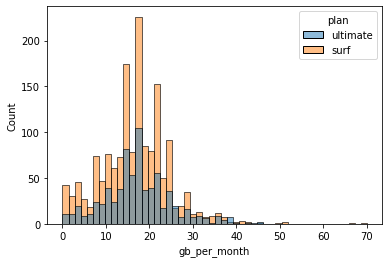

In [75]:
sns.histplot(df_merged,x='gb_per_month',hue='plan', bins=50)

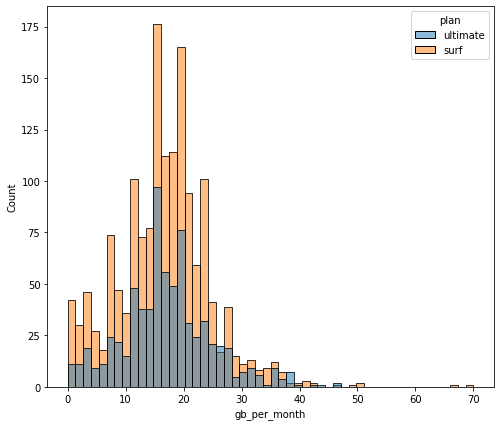

Average is 16.797221016066
plan
surf        16.607346
ultimate    17.211326
Name: gb_per_month, dtype: float64
Centered around average


In [76]:
df_stat('gb_per_month')

On Ultimate plan we see that mean is a little bit higher, but both of histograms seems as normal distribution.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Seems to be true. 
</div>

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [77]:
compare_revenue = df_merged.pivot_table(index=['plan'], values='total_revenue_per_month', aggfunc=('mean')).sort_values(by=['plan'], ascending=True).reset_index()
display(compare_revenue)

,plan,total_revenue_per_month
0,surf,68.949449
1,ultimate,105.850829


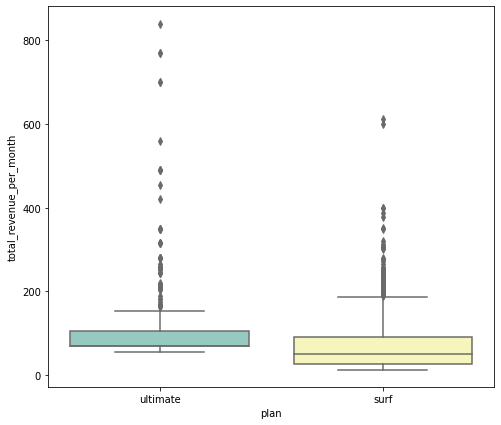

In [78]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan',y="total_revenue_per_month",
                 data=df_merged, palette="Set3")

In [79]:
df_merged.groupby(['plan'])['total_revenue_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1579.0,68.949449,59.312420,13.333333,25.445,50.12,90.462222,611.41
ultimate,724.0,105.850829,84.005863,56.000000,70.000,70.00,105.000000,840.00


<AxesSubplot:xlabel='total_revenue_per_month', ylabel='Count'>

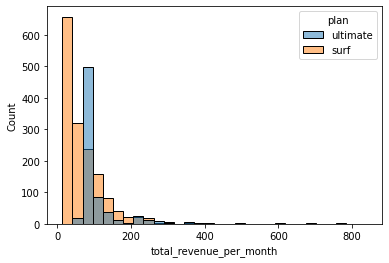

In [80]:
sns.histplot(df_merged,x='total_revenue_per_month',hue='plan', bins=30)

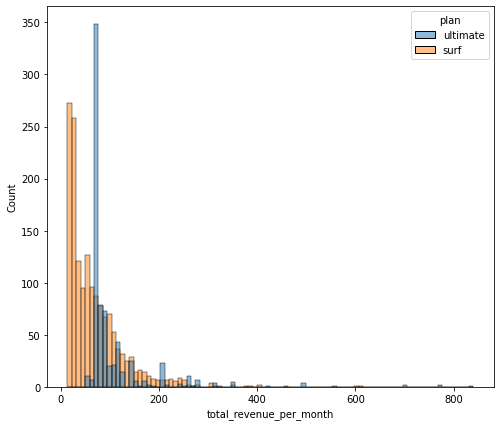

Average is 80.55023013460703
plan
surf         68.949449
ultimate    105.850829
Name: total_revenue_per_month, dtype: float64
Centered around average


In [81]:
df_stat('total_revenue_per_month')

Revenue very differs between the plans. Average revenue from clients with Ultimate plan higher more than 50%

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

This one may change.    
    
</div>

<div class="alert alert-block alert-info"> <b>Seems like I did something wrong, result didn't change</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
It will after we fix the revenue issue :) </div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Everything is ok here.    
</div>

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null hypothesis: the average revenue from users of the Ultimate and Surf calling plans is the same.

Alternative hypothesis: the average revenue from users of the Ultimate and Surf calling plans differs.

T-test with alpha = 0.5

In [82]:
# Test the hypotheses
revenue_data = df_merged[['user_id', 'month', 'plan', 'total_revenue_per_month']]
revenue_data

,user_id,month,plan,total_revenue_per_month
0,1000,12,ultimate,70.00
1,1001,8,surf,20.00
2,1001,9,surf,20.00
3,1001,10,surf,90.09
4,1001,11,surf,60.00
...,...,...,...,...
2298,1498,12,surf,100.00
2299,1499,9,surf,40.00
2300,1499,10,surf,90.00
2301,1499,11,surf,60.00


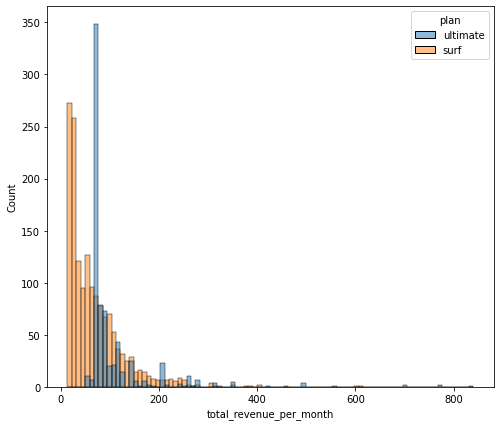

In [83]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(revenue_data, x="total_revenue_per_month", hue="plan")

In [84]:
ultimate=revenue_data.query('plan=="ultimate"')
surf=revenue_data.query('plan=="surf"')

In [85]:
sample1=ultimate['total_revenue_per_month']
sample2=surf['total_revenue_per_month']

In [86]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=12.082789168977845, pvalue=1.2391276149183227e-32)

In [87]:
p_value=stats.ttest_ind(sample1, sample2).pvalue
p_value

1.2391276149183227e-32

In [88]:
def t_test(x,y,alpha=0.05):
    p_value=stats.ttest_ind(x, y).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 
        
t_test(sample1,sample2,alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment  </b>
    

We should also print `pvalue`. Sometimes strange pvalue like zero or Nan may tell us that there's something wrong in the data.    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
You can print it in the function as well :) 

</div>

<div class="alert alert-block alert-info"> <b>Did it below, thanks!</b> <a class="tocSkip"></a> 
</div>

In [89]:
def t_test(x,y,alpha=0.05):
    p_value=stats.ttest_ind(x, y).pvalue
    print('P-Value is: ', p_value)
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same") 
        
t_test(sample1,sample2,alpha=0.05)

P-Value is:  1.2391276149183227e-32
Reject H0: average of sample 1 is not equal to average of sample 2


In [90]:
print(stats.ttest_ind(sample1,sample2).pvalue)

1.2391276149183227e-32


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null hypothesis: the average revenue from users in the NY-NJ is the same with users from the other regions.

Alternative hypothesis: the average revenue from users in the NY-NJ is different from that of the users from the other regions.

T-test with alpha = 0.5

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Correct. </div>

In [91]:
df_users['NYNJ']=df_users['city'].apply(lambda x:1 if x=='New York-Newark-Jersey City, NY-NJ-PA MSA' else 0)
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month_used,NYNJ
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31,5,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31,3,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31,12,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31,8,0
...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31,4,1
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31,11,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31,1,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31,11,1


In [92]:
df_users_ny = df_users.loc[:, df_users.columns.isin(['user_id', 'NYNJ'])]
df_users_ny

,user_id,NYNJ
0,1000,0
1,1001,0
2,1002,0
3,1003,0
4,1004,0
...,...,...
495,1495,1
496,1496,0
497,1497,0
498,1498,1


In [93]:
data_frames3 = [revenue_data, df_users_ny]
revenue_data_ny = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],
                                            how='outer'), data_frames3)
revenue_data_ny = revenue_data_ny.sort_values(by=['user_id', 'month']).reset_index(drop=True)
revenue_data_ny

,user_id,month,plan,total_revenue_per_month,NYNJ
0,1000,12,ultimate,70.00,0
1,1001,8,surf,20.00,0
2,1001,9,surf,20.00,0
3,1001,10,surf,90.09,0
4,1001,11,surf,60.00,0
...,...,...,...,...,...
2298,1498,12,surf,100.00,1
2299,1499,9,surf,40.00,0
2300,1499,10,surf,90.00,0
2301,1499,11,surf,60.00,0


<function matplotlib.pyplot.show(close=None, block=None)>

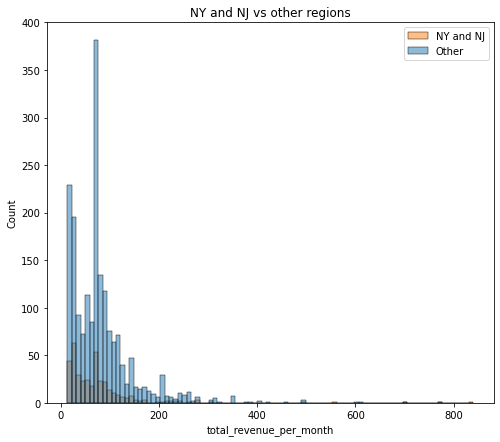

In [94]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(revenue_data_ny, x="total_revenue_per_month", hue="NYNJ").set(title='NY and NJ vs other regions')
plt.legend(labels=["NY and NJ","Other"])
plt.show

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

Please, do not forget to add titles and more clear legends :)     
    
</div>

<div class="alert alert-block alert-info"> <b>It looks like the histograms are similar, there are 2 peaks in the same places. The difference is in quantity. It can be assumed that the behavior of clients is the same, but I need to check this with statistical methods.</b> <a class="tocSkip"></a> 
</div>

In [95]:
from_ny=revenue_data_ny.query('NYNJ==1')
from_other=revenue_data_ny.query('NYNJ==0')
sample3=from_ny['total_revenue_per_month']
sample4=from_other['total_revenue_per_month']

In [96]:
stats.ttest_ind(sample3, sample4)

Ttest_indResult(statistic=-1.3455739876363764, pvalue=0.17857251895670215)

In [97]:
p_value=stats.ttest_ind(sample3, sample4).pvalue
p_value

0.17857251895670215

In [98]:
t_test(sample3,sample4,alpha=0.05)

P-Value is:  0.17857251895670215
Fail to Reject H0: We don't have enough evidence to say that averages of sample 1   and sample 2 are not the same


The average revenue from users in the NY-NJ is the same with users from the other regions

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

The results here may change.     
    
</div>

## General conclusion

From the analysis, we realized that, on average, customers of the Ultimat tariff bring more profit.
The behavior of clients of different tariffs is not similar, although both have a large number of clients who do not go beyond the tariff.
The average revenue from users in the NY-NJ is the same with users from the other regions.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

It would be great if you added more details to the conclusion. For example, we can add a couple of sentences about their distributions.
    
</div>

<div class="alert alert-block alert-info"> <b>The distribution of customers of both tariffs is similar - at the beginning there is a peak, and then the graph is skewed to the right. Most people try not to go beyond the tariff, and they only pay for the tariff. Therefore, the Ultimat tariff brings more profit - its price is 3.5 times higher. Also we see more outliers in Ultimate, that brings more profit too.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Excellent!  </div>